<a href="https://colab.research.google.com/github/ZackAkil/break-and-make-ml-on-gcp/blob/master/answers/Session%201%20-%20Pre-trained%20APIs%20_%20Heuristic%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 1 - Pre-trained APIs & Heuristic models 

The easiest models to build are the ones that are already built for you. 

Google has already trained powerful generic models for [Vision](https://cloud.google.com/vision) and [Natural Language](https://cloud.google.com/natural-language/) that you can use via a REST API or client libraries.

In [0]:
# import requests - using request to make api calls
import requests
import json
import base64

Upload any image you want to the Colab environment using the files tab or run the following `wget` command to download a test image.

The following code with download a test image from guthub:

```bash
!wget https://raw.githubusercontent.com/ZackAkil/break-and-make-ml-on-gcp/master/teapot.jpg
```

Convert the image you downloaded into base64 so that is can be sent to the Vision API:

the following code gets teh byte data from a local file:

```python
with open("LOCAL IMAGE FILE NAME", "rb") as image_file:
    image_bytes = image_file.read()
```

the following code converts image bytes to base64:
```python
encoded_string = base64.b64encode(IMAGE_BYTES).decode('utf-8')
```



In [0]:
# get local image and convert to base64



https://cloud.google.com/vision

Create request body that is sent to API:

The sturcture of the request body is as follows:

```javascript
{
  "requests":[
    {
      "image":{
        "content": IMAGE DATA ENCODED AS BASE64
      },
      "features":[
        {
          "type":"LABEL_DETECTION",
          "maxResults":20
        }
      ]
    }
  ]
}

```

In [0]:
body = '[YOUR_REQUEST_BODY]'

## Accessing the API
You'll need to have your're own API key to called the API.

In the Cloud Console, `API Keys & Authentication > Create new key > Create`

<img height=300px src="https://raw.githubusercontent.com/ZackAkil/break-and-make-ml-on-gcp/master/screenshot/apikey.png"/>

In [0]:
API_KEY = '[YOUR API KEY]'

req = requests.post('https://vision.googleapis.com/v1/images:annotate?key=' + API_KEY,
                   headers = {'Content-Type':'application/json'},
                   json = body)

Look at the predicted labels (i.e the response from the API) by calling:

```python
req.json()
```

In [0]:
# LOOK AT PREDICTED LABELS
# WRITE YOUR CODE HERE 


## Build a simple tea pot detector
Now that you can fetch generic labels from the API, you have enough information to check if the image is of something specific or not e.g is one of the labels "Tea Pot".

### Task: 
Write a function that returns `true` if there is a "Teapot" in an image sent to the Vision API.

```python
is_teapot(req.json())
```

In [0]:
def is_teapot(request_json):
    
    # WRITE YOUR CODE HERE
 

    return False

# TESTS
res_test_1 = {'responses': [{'labelAnnotations': [
    {'description': 'Face',
     'mid': '/m/0dzct',
     'score': 0.97045726,
     'topicality': 0.97045726},
    {'description': 'Facial expression',
     'mid': '/m/01k74n',
     'score': 0.944795,
     'topicality': 0.944795},
    {'description': 'Facial hair',
     'mid': '/m/0ds5b',
     'score': 0.60713905,
     'topicality': 0.60713905},
    {'description': 'Art',
     'mid': '/m/0jjw',
     'score': 0.5021872,
     'topicality': 0.5021872}]}]}

res_test_2 = {'responses': [{'labelAnnotations': [
    {'description': 'Face',
     'mid': '/m/0dzct',
     'score': 0.97045726,
     'topicality': 0.97045726},
    {'description': 'Facial expression',
     'mid': '/m/01k74n',
     'score': 0.944795,
     'topicality': 0.944795},
    {'description': 'Teapot',
     'mid': '/m/0ds5b',
     'score': 0.60713905,
     'topicality': 0.60713905},
    {'description': 'Art',
     'mid': '/m/0jjw',
     'score': 0.5021872,
     'topicality': 0.5021872}]}]}

if not is_teapot(res_test_1):
    print("First test PASSED")
else:
    print("First test FAILED")

if is_teapot(res_test_2):
    print("Second test PASSED")
else:
    print("Second test FAILED")

# Heuristic models
Before you embark on large machine learning projects, it's important you first try to solve the problem using traditional code i.e. `if` statements and `loops`. 

This will serve to clarify what machine learning is trying to solve and it might even already solve the problem saving you from investing more time into more complex machine learning.

### Download dataset from Google Cloud Storage
There is a public csv file stored a Cloud Storage Bucket.
You can download it using the `gsutil` (Google Storage Utilities) which is build into Colab:

```bash
!gsutil cp gs://zacks-fun-datasets/works_in_ml.csv .
```

In [2]:
!gsutil cp gs://zacks-fun-datasets/works_in_ml.csv .

Copying gs://zacks-fun-datasets/works_in_ml.csv...
/ [1 files][  1.4 KiB/  1.4 KiB]                                                
Operation completed over 1 objects/1.4 KiB.                                      


import the downloaded file to Colab using pandas

In [3]:
import pandas as pd

# look at data
data = pd.read_csv('works_in_ml.csv')
data

,ML Tweets,ML Blogs,ML Videos,ML Talks,Works in ML
0,19,33,23,29,1
1,8,17,0,16,0
2,17,19,12,19,1
3,19,12,16,25,0
4,20,5,24,15,0
5,20,20,24,16,0
6,15,6,5,20,0
7,25,20,16,13,0
8,14,27,11,29,1
9,16,6,6,24,1


examine the datat using matplotlib:

import matplotlib using:

```python
import matplotlib.pyplot as plt
```

create plots using:
```python
plt.scatter(data['ML Tweets'], data['ML Blogs'], c=data['Works in ML'])
```


In [0]:
# explore the data
import matplotlib.pyplot as plt

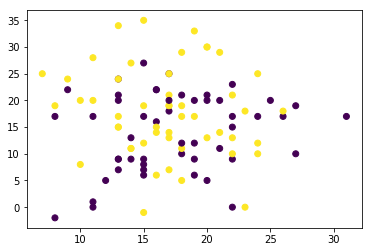

In [5]:
plt.scatter(data['ML Tweets'], data['ML Blogs'], c=data['Works in ML'])

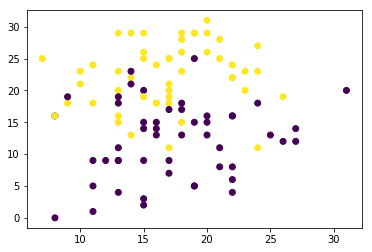

In [7]:
plt.scatter(data['ML Tweets'], data['ML Talks'], c=data['Works in ML'])

There is a tool in pandas called [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) which might help

In [6]:
# check for clear correlations between input data and output label
data.corr()

,ML Tweets,ML Blogs,ML Videos,ML Talks,Works in ML
ML Tweets,1.000000,0.013549,0.089442,0.082840,-0.056539
ML Blogs,0.013549,1.000000,0.318990,0.388307,0.237779
ML Videos,0.089442,0.318990,1.000000,-0.192119,-0.187369
ML Talks,0.082840,0.388307,-0.192119,1.000000,0.681465
Works in ML,-0.056539,0.237779,-0.187369,0.681465,1.000000


build a simple model for making prediction using a simple `if` satement:

In [0]:
# create model
def model(x):
    '''
      x = input data frame
    '''
    return x['ML Talks'] > 15

## Test the accuracy of your model

Using a accuracy metric from SciKit Learn:

```python
from sklearn.metrics import accuracy_score
```

In [11]:
# test model performance
from sklearn.metrics import accuracy_score


accuracy_score(data['Works in ML'], model(data))

0.79

Take your model and put it in a Cloud Function:

<img height=300px src="https://raw.githubusercontent.com/ZackAkil/break-and-make-ml-on-gcp/master/screenshot/cloudfunction.png">


In [13]:
# call the cloud function you just created

req = requests.post('https://us-central1-feisty-bindery-212509.cloudfunctions.net/works-in-ml',
                   json = {"ML Talks":20, "ML Tweets": 5, "ML Blogs": 1, "ML Videos": 23})

req.json()

{'prediction': True}

# Congratulations!
You successfully build 2 models that could work in production using the pre-trained Vision API and CLoud Functions!

Maybe play aroudn with the other annotation features of the Vison API e.g. face emotion detection, or upload version 2 of your Cloud Function with a better performing heuristic model